## Section 1

You can use the implementation described in https://keras.io/examples/vision/grad_cam/ for section 1 of problem 2.

In [1]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [5]:
!pwd

/content/drive/MyDrive


## Import Libraries and load cifar10 dataset.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D, MaxPool2D
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Define Helper functions

In [8]:
def get_img_array(img_path, size):

    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()



def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
# Load the original image
#    img = keras.preprocessing.image.load_img(img_path)
    img = img_path *255.0
#    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255*heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
#    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
#    superimposed_img.save(cam_path)

    # Display Grad CAM
    plt.figure(figsize=(5, 5))

    plt.imshow(superimposed_img/255.0)

#    plt.matshow(superimposed_img/255.0)


def save_and_display_gradcam2(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))





def build_model():
    #TODO: Create Model with model_builder(weights="imagenet"), remove last layer's softmax and return model.

    model = tensorflow.keras.models.load_model('mlcv_weights/model2')
    
    # I did not add the softmax layer in the end


    return model
    
  

def plot_heatmap(heatmap):
    # TODO: Display heatmap

    plt.matshow(heatmap)
    plt.show()


def preprocess_input(x):
    return x/255.0



# Validating if model is properly loaded

In [9]:
model = build_model()

In [8]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train2=to_categorical(y_train)
y_test2=to_categorical(y_test)
x_train = x_train/255.0
x_test = x_test/255.0
model = tensorflow.keras.models.load_model('mlcv_weights/model3')
print(model.evaluate(x_test,y_test2,verbose=1))

313/313 [==============================] - 39s 122ms/step - loss: 1.0267 - accuracy: 0.7421
[1.026746153831482, 0.7421000003814697]


### Define Configurable parameters 

### Test Grad CAM on desired image

In [ ]:
model.summary()

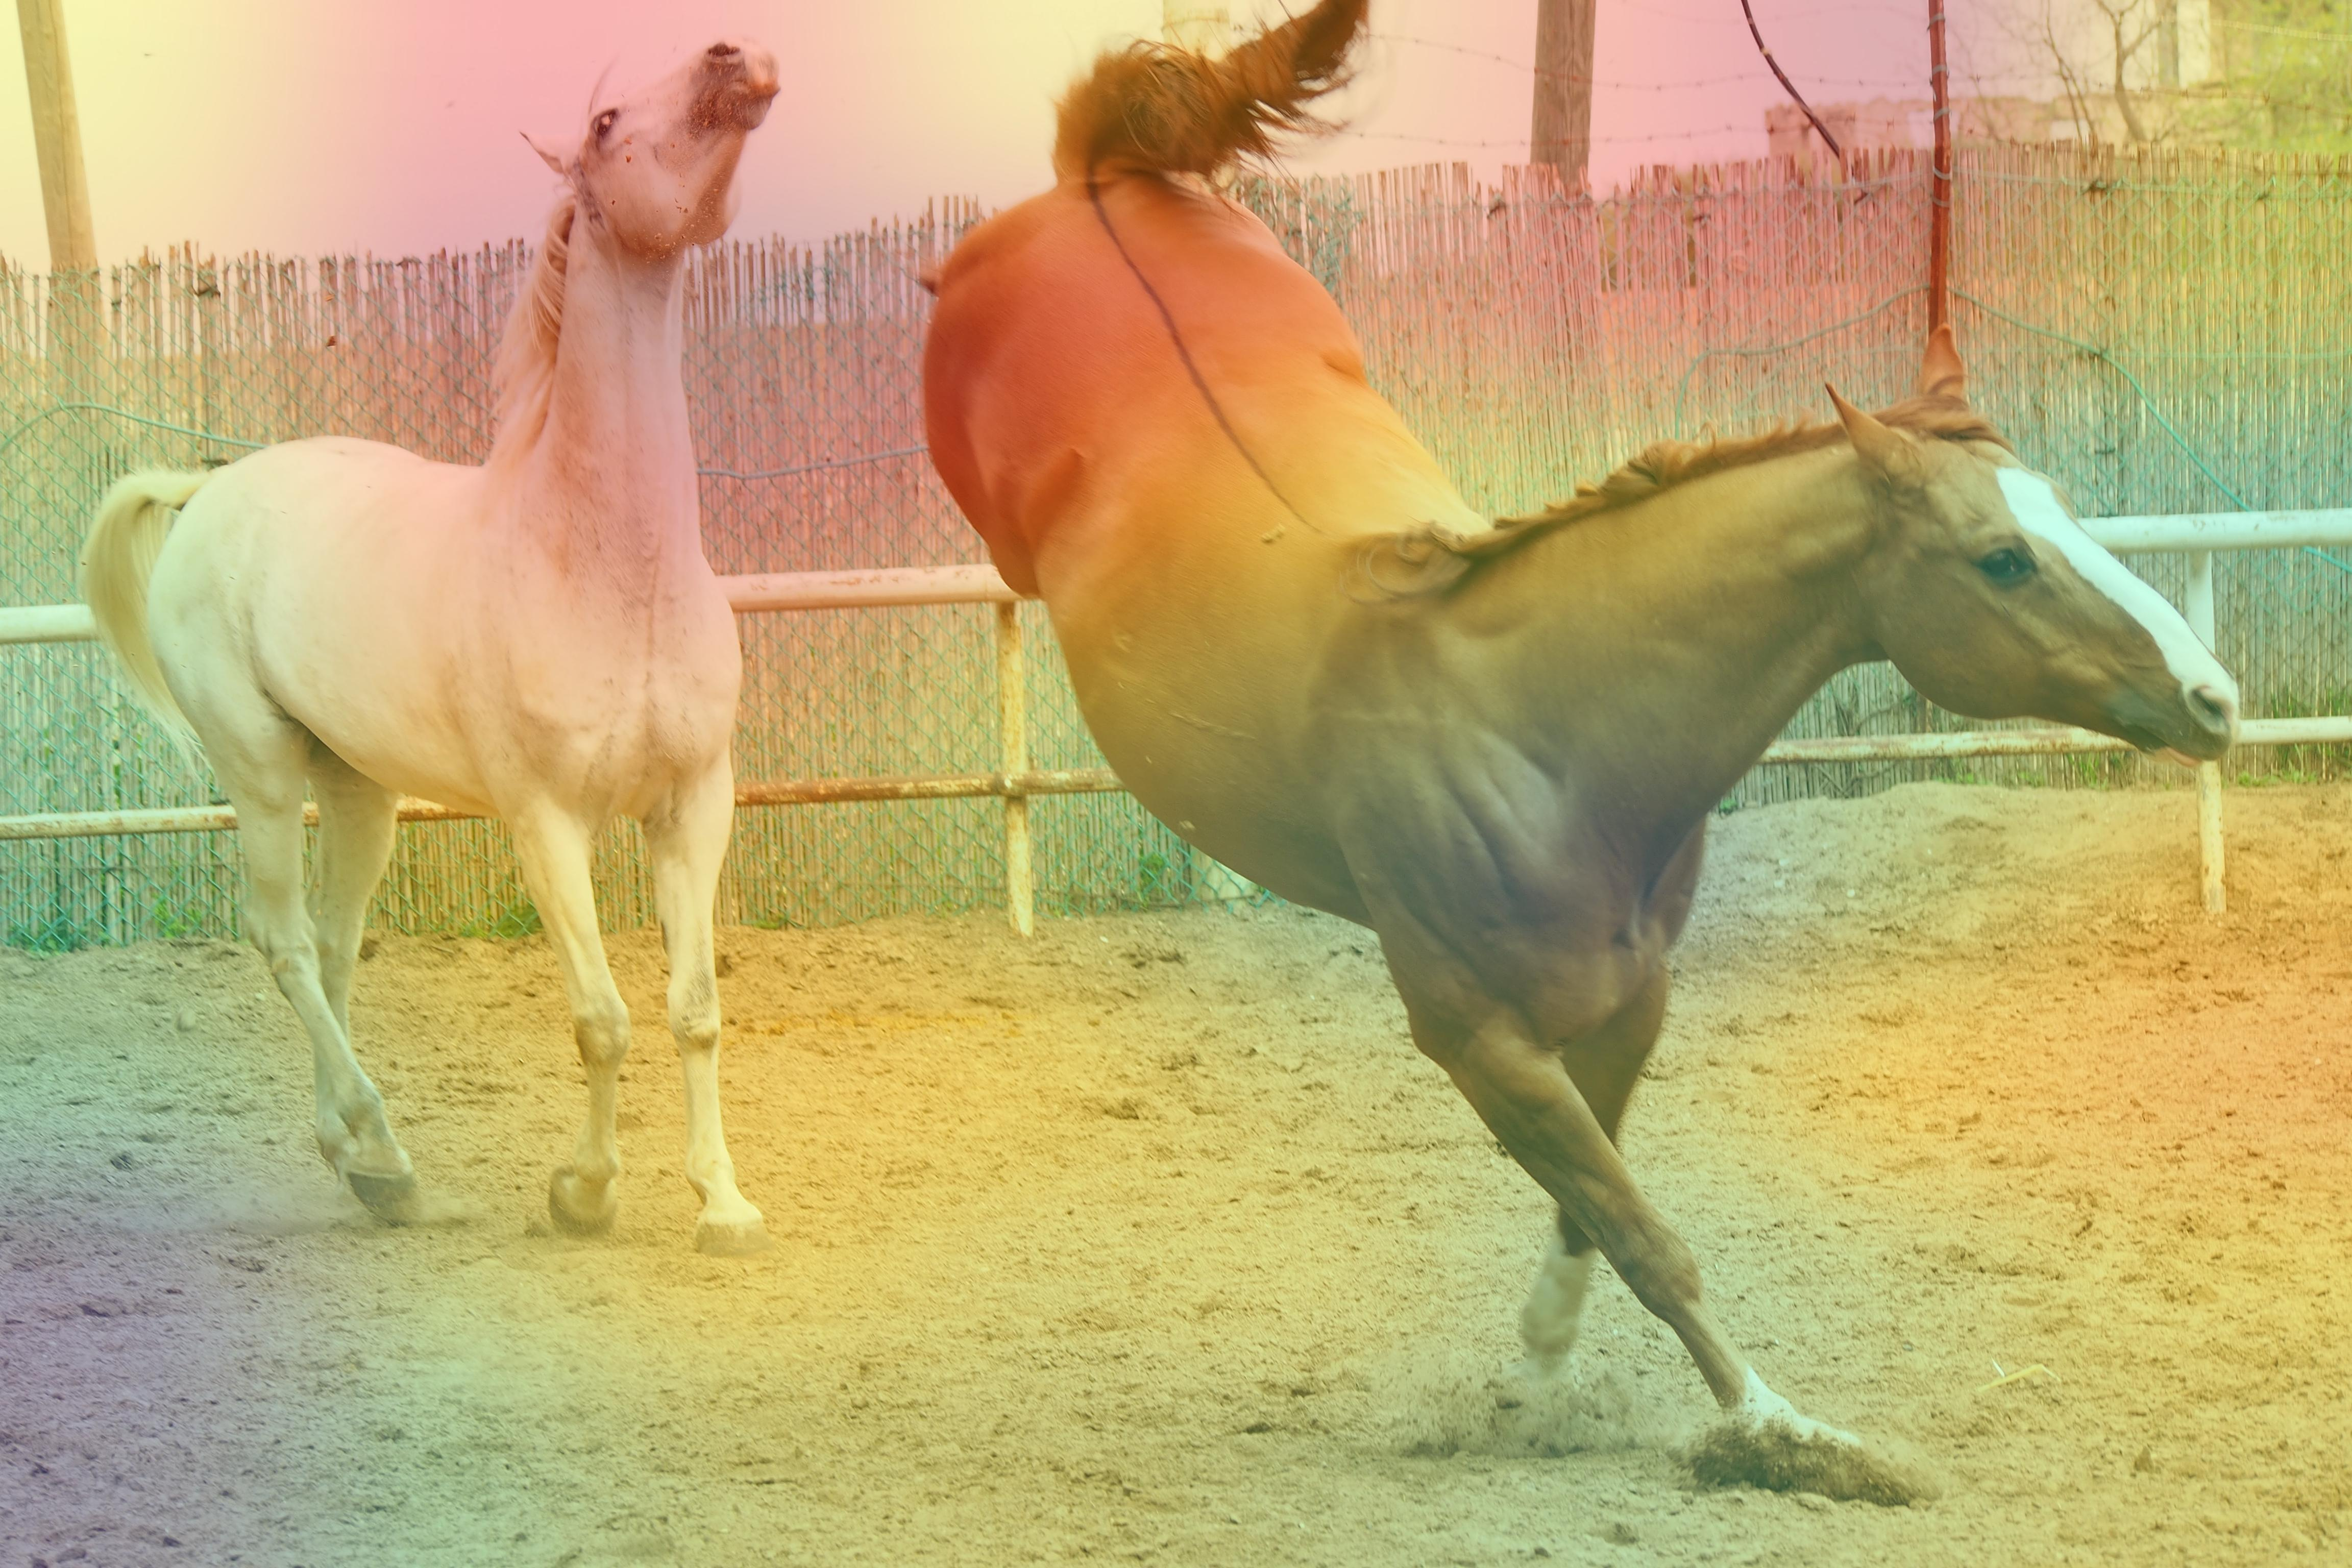

In [ ]:
img_path = keras.utils.get_file(
    "cat_and_dog.jpg",
    "https://www.thesprucepets.com/thmb/KYaXBSM013GnZ2jEZJnX4a9oIsU=/3865x2174/smart/filters:no_upscale()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg",)

img_path = "/content/hores-kicking-another.jpg"
#display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=(32,32)))

last_conv_layer_name = "conv2_block1_3_conv"

# Print what the two top predicted classes are
preds = model.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=2)[0])

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=7)

save_and_display_gradcam2(img_path, heatmap)

# Visualizing on a randomly taken Horse Image

CIFAR-10 dataset class labels. Horse coresponds to label ' 7 '
- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
help(enumerate)

In [ ]:
x_subset=[]
for i,j in enumerate((y_test == 7)):
    if j==True:
        x_subset.append(x_test[i])

x_subset = np.array(x_subset)

In [ ]:
x_subset.shape
# 1000 images belong to class horse in CIFAR-10 test dataset

(1000, 32, 32, 3)

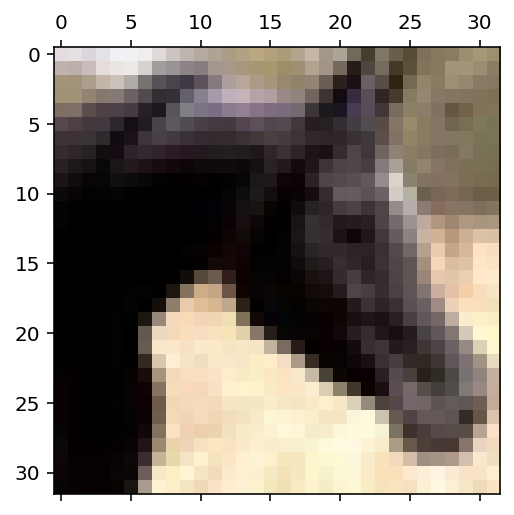

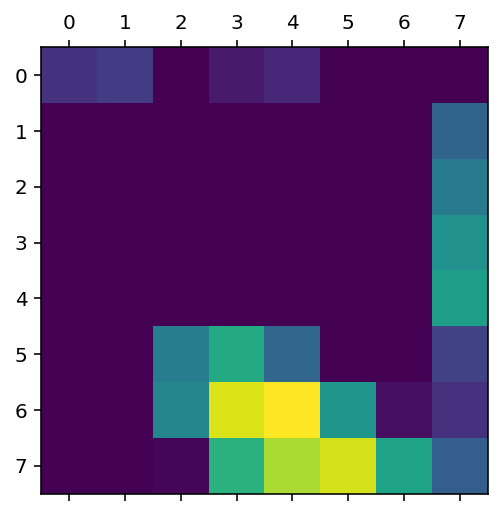

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


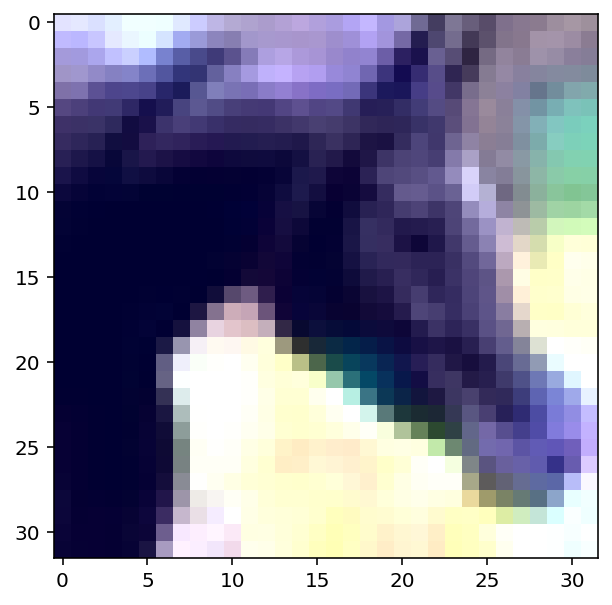

In [ ]:
#taking only 8 images
x_plot = x_subset[17:18]
plt.matshow(x_plot.reshape(32,32,3))
plt.show()
heatmap = make_gradcam_heatmap(x_plot, model, last_conv_layer_name,pred_index=7)
plot_heatmap(heatmap)

save_and_display_gradcam(x_plot.reshape(32,32,3), heatmap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


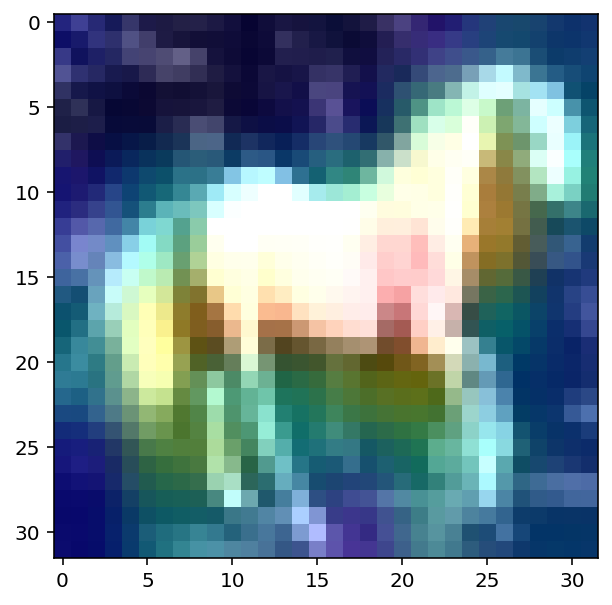

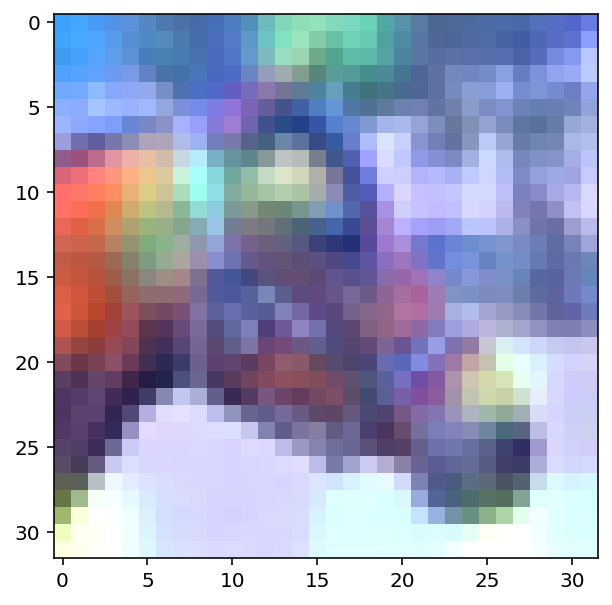

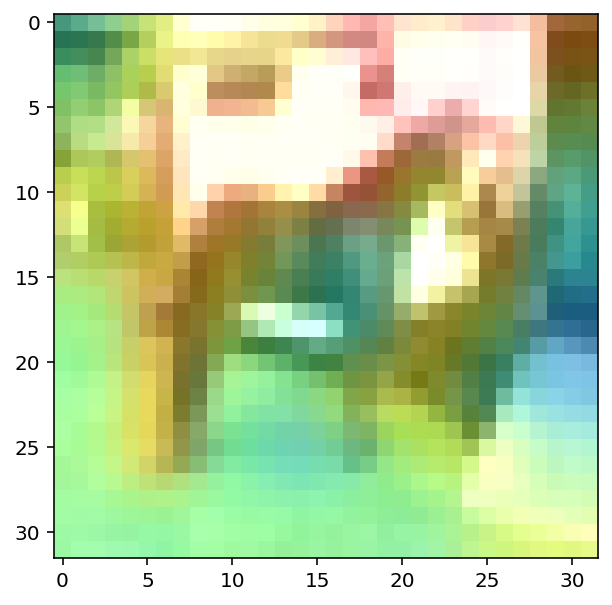

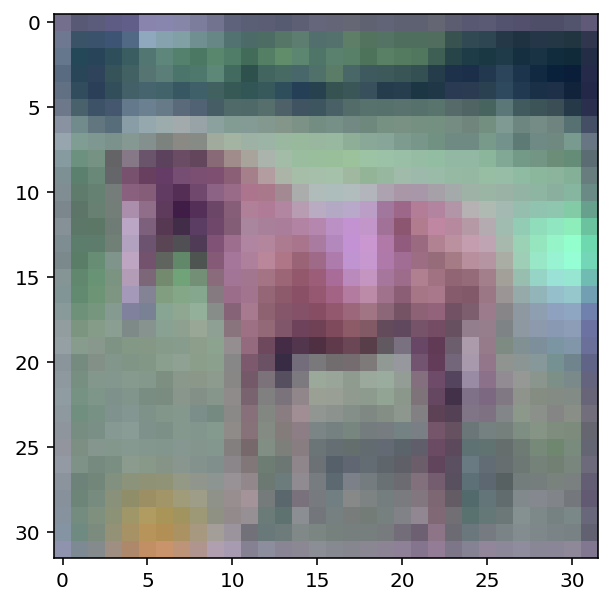

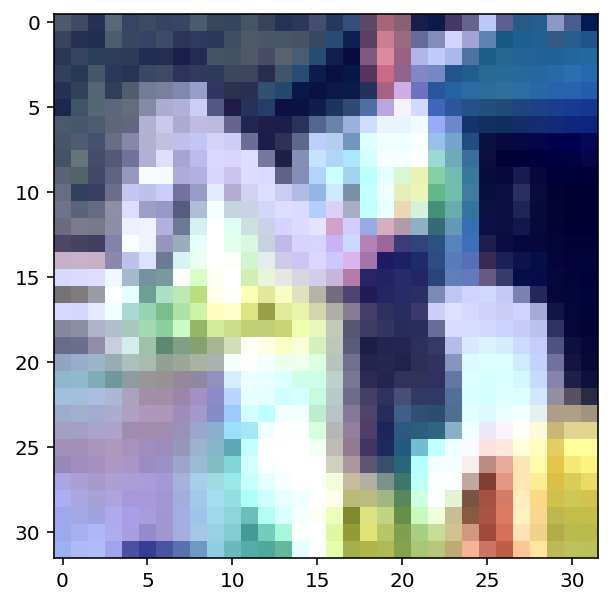

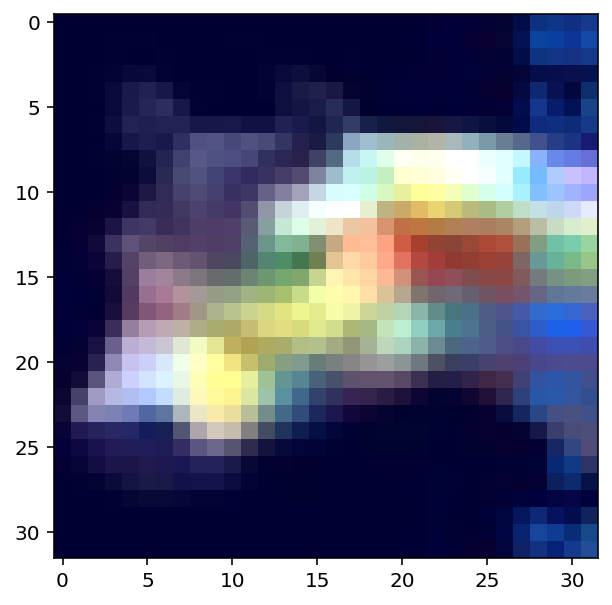

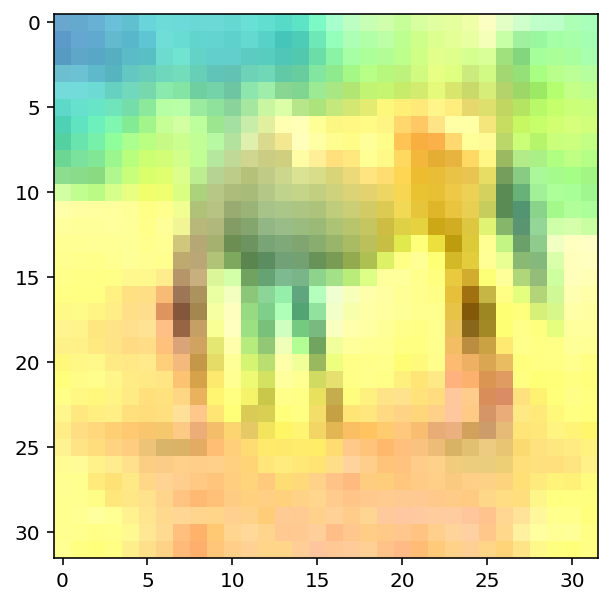

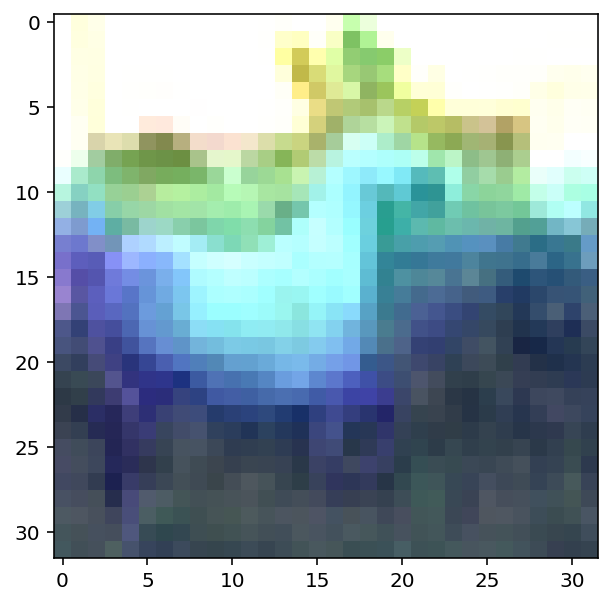

In [ ]:
for x_plot in x_subset[0:8]:
    i = x_plot[:]
    image = np.expand_dims(i, axis=0)
#    print(image)


    preds = model.predict(image)
    # Step 3 Generate class activation heatmap


    heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name,pred_index=7)

    #Step 4 Plot heatmap 
#    plot_heatmap(heatmap)

    #Step 5 Display gradcam with image path and heatmap.
    save_and_display_gradcam(x_plot.reshape(32,32,3), heatmap)

    

# Section 2

TODO: Please refer to https://github.com/tensorflow/tcav to use TCAV. This repository has an example on using TCAV on Jupyter notebook as well -- https://github.com/tensorflow/tcav/blob/master/Run_TCAV_on_colab.ipynb

In [10]:
!pip install -q xplique

import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

import xplique

- Loading concept images . We will use Broden dataset, this dataset contains images related to concept like 'striped', 'veined'...

In [11]:
def central_crop_and_resize(img, input_size):
  """
  given a numpy array, extracts the largest possible square and resizes it to the requested size
  """
  h, w, _ = img.shape

  min_side = min(h, w)
  max_side_center = max(h, w) // 2.0
  
  min_cut = int(max_side_center-min_side//2)
  max_cut = int(max_side_center+min_side//2)
  
  img = img[:, min_cut:max_cut] if w > h else img[min_cut:max_cut]
  img = tf.image.resize(img, (input_size, input_size)).numpy()

  return img 

In [12]:
# Let's load images associated to the concept we want to test

In [65]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
y_train2=to_categorical(y_train)
y_test2=to_categorical(y_test)

# 23 is class name for cloud class

x_cloud=[]
x_negative=[]
for i,j in enumerate((y_test == 23)):
    if j==True:
        x_cloud.append(x_test[i])

x_cloud = np.array(x_cloud)[0:50]


## Visualizing a few images for correctness

<Figure size 360x360 with 0 Axes>

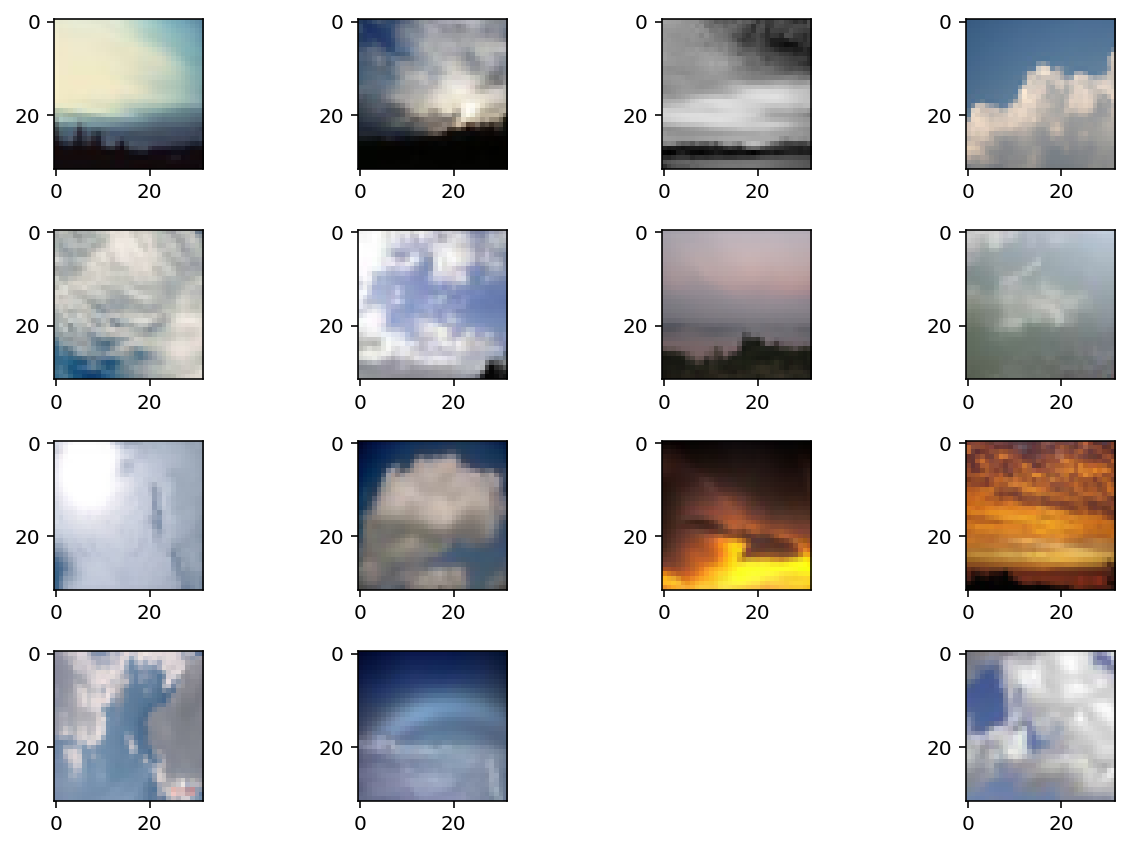

In [66]:
plt.figure(figsize=(5, 5))

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

#            for i in range(8):
for i,j in enumerate(axs.flat):
    ax =j
    ax = plt.subplot(4, 4, i + 1)
#                
    plt.imshow(x_cloud[i])
    plt.tight_layout()



# Load natural image data

These images will be our negative anchors, the goal will be to compare the embedding of the model between the images containing the concept and the natural images in order to deduce the concept vector.

In [67]:
# 46 is class name for man class

x_negative=[]

my_list = [0,1,2,3,4,5,6,100,1]

mask = np.isin(y_test,my_list)

for i,j in enumerate(mask):
    if j==True:
        x_negative.append(x_test[i])

x_negative = np.array(x_negative)

<Figure size 360x360 with 0 Axes>

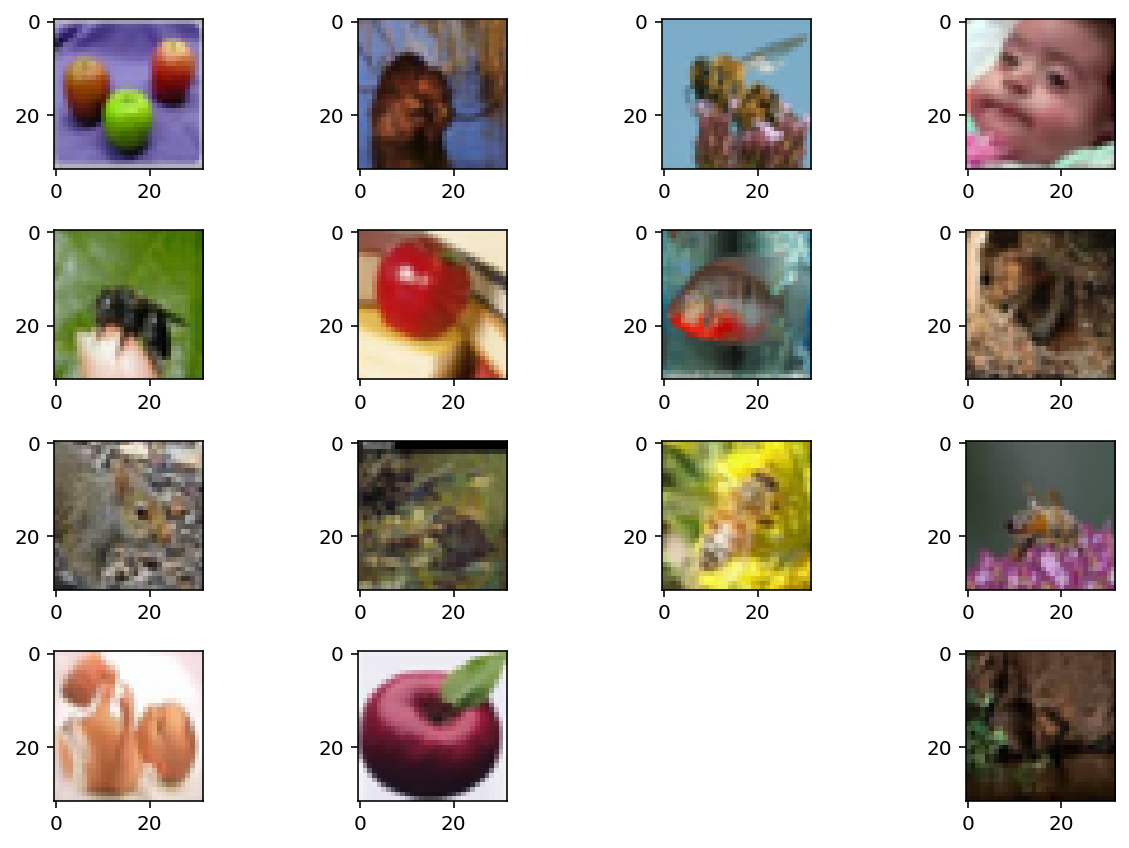

In [68]:
plt.figure(figsize=(5, 5))

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

#            for i in range(8):
for i,j in enumerate(axs.flat):
    ax =j
    ax = plt.subplot(4, 4, i + 1)
#                
    plt.imshow(x_negative[i])
    plt.tight_layout()


# Now we can extract the Concept Activation Vector (CAV) ! 

To extract this concept vector, we need positive elements (containing the concept) and negative elements (not containing the concept). 


Let's load a pre-trained model, preprocess our input for this model and extract our first CAV.

In [69]:
import tensorflow.keras.applications as app

#1 model, preprocess = app.InceptionV3(), app.inception_v3.preprocess_input
#model, preprocess = app.InceptionV3(), app.inception_v3.preprocess_input

model = tensorflow.keras.models.load_model('mlcv_weights/model3')
print(model.summary())
layer_target = 'conv2_block1_3_conv'

# remove the softmax because we are only interested in the value of the logits
#model.layers[-1].activation = tf.keras.activations.linear

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [70]:
def preprocess(img_array):
    return img_array/255.0

In [71]:
from xplique.concepts import Cav


positive = x_cloud
negative = x_negative


positive_preprocessed = preprocess(np.array(positive, copy=True))
negative_preprocessed = preprocess(np.array(negative, copy=True))


#positive_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    positive_preprocessed, (299,299), interpolation='bilinear'
#)

#negative_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    negative_preprocessed, (299,299), interpolation='bilinear'
#)

print(f'Cloud dataset: {positive_preprocessed.shape}, Random dataset: {negative_preprocessed.shape}')

# make sure you have a balanced dataset to extract cav (~same number of positive / negative) 
cav_extractor = Cav(model, layer_target, batch_size=64)
cav_cloud = cav_extractor(positive_preprocessed, negative_preprocessed[:len(positive_preprocessed)])

print(f'Concept Vector for cloud computed ! shape: {cav_cloud.shape}')

Cloud dataset: (50, 32, 32, 3), Random dataset: (700, 32, 32, 3)
Concept Vector for cloud computed ! shape: (8, 8, 256)


In [72]:
cavs = {}

texture_name = 'cloud'
imgs = x_cloud
random_dataset = x_negative

imgs_preprocessed = preprocess(np.array(imgs, copy=True))
random_preprocessed = preprocess(np.array(random_dataset, copy=True))[:len(imgs_preprocessed)]

#imgs_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    imgs_preprocessed, (299,299), interpolation='bilinear'
#)

#random_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    random_preprocessed, (299,299), interpolation='bilinear'
#)

cav = cav_extractor(imgs_preprocessed, random_preprocessed)
  
cavs[texture_name] = cav

print(f'Concept Activation Vector for {texture_name} computed.')

Concept Activation Vector for cloud computed.


Here we will test the extracted concepts on some classes.

We start by extracting several CAVs by varying the random elements, then we will test the average effectiveness of these CAVs against random CAVs.

In [73]:
# extracting multiple cav for each concept
cavs = {}

random_preprocessed = preprocess(np.array(random_dataset, copy=True))[:len(imgs_preprocessed)]

nb_repeat = 30


texture_name = 'cloud'
imgs = x_cloud
random_dataset = x_negative
imgs_preprocessed = preprocess(np.array(imgs, copy=True))

#imgs_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    imgs_preprocessed, (299,299), interpolation='bilinear'
#)

#random_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    random_preprocessed, (299,299), interpolation='bilinear'
#)
  
for repeat_id in range(nb_repeat):
    # choose different random images for each cavs repetition
    random_ids = np.random.choice(len(random_preprocessed), len(imgs_preprocessed))
    cav = cav_extractor(imgs_preprocessed, random_preprocessed[random_ids])
    
    if texture_name not in cavs:
      cavs[texture_name] = []

    cavs[texture_name].append(cav)
  
print(f"Done for texture {texture_name}.")

# do the same things for random images
for repeat_id in range(nb_repeat):
  # choose 200 random images, 100 as positive and 100 as negative
  random_ids = np.random.choice(len(random_preprocessed), 200)
  random_1, random_2 = random_ids[:100], random_ids[100:]
  
  cav = cav_extractor(random_preprocessed[random_1], random_preprocessed[random_2])
  
  if 'random' not in cavs:
    cavs['random'] = []

  cavs['random'].append(cav)

print(f"Done for texture Random.")

Done for texture cloud.
Done for texture Random.




Class: airplane  - shape: (50, 32, 32, 3)


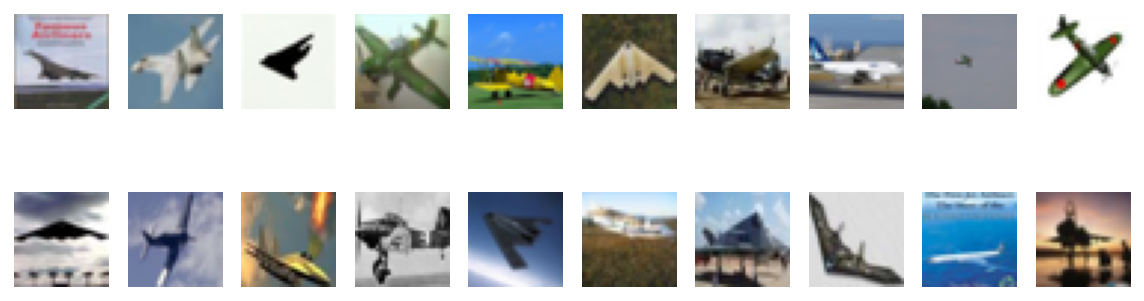

In [74]:
import time
nb_samples = 50

def load_collection(x_test, nb_samples):

  return x_test[0:nb_samples]
class_to_load = [('airplane', 0) 

]

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train2=to_categorical(y_train)
y_test2=to_categorical(y_test)
#x_train = x_train/255.0
#x_test = x_test/255.0

# 0 is class name for airplane class

x_aeroplane=[]
for i,j in enumerate((y_test == 0)):
    if j==True:
        x_aeroplane.append(x_test[i])

x_aeroplane = np.array(x_aeroplane)



#CIFAR-10 dataset class labels. Horse coresponds to label ' 7 '
#- airplane : 0
#- automobile : 1
#- bird : 2
#- cat : 3
#- deer : 4
#- dog : 5
#- frog : 6
#- horse : 7
#- ship : 8
#- truck : 9
classes_images = {(cls, id): load_collection(x_aeroplane, nb_samples) for (cls, id) in class_to_load}



plt.rcParams["figure.figsize"] = [10, 3]
for (class_name, class_id), images in classes_images.items():
  print(f"\n\nClass: {class_name}  - shape: {images.shape}")
  for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i] / 255.0)
    plt.axis('off')
  plt.show()

In [75]:
from xplique.concepts import Tcav

tcav_scores = {}
cav_tester = Tcav(model, layer_target)

for (class_name, class_id), imgs in classes_images.items():
  tcav_scores[class_name] = {}



  # discard all the image that have the wrong predictions
  imgs_preprocessed = preprocess(np.array(imgs, copy=True))



#  imgs_preprocessed =tf.keras.preprocessing.image.smart_resize(
#    imgs_preprocessed, (299,299), interpolation='bilinear'
#)

  predictions = np.argmax(model.predict(imgs_preprocessed, batch_size=32), -1)
  valid_imgs = imgs_preprocessed[predictions == class_id]

  # for each concept, we take all the CAVs and test them against each class
  for concept_name, _cavs in cavs.items():
    tcav_scores[class_name][concept_name] = []

    for cav in _cavs:
      score = cav_tester(valid_imgs, class_id, cav)
      tcav_scores[class_name][concept_name].append(score)

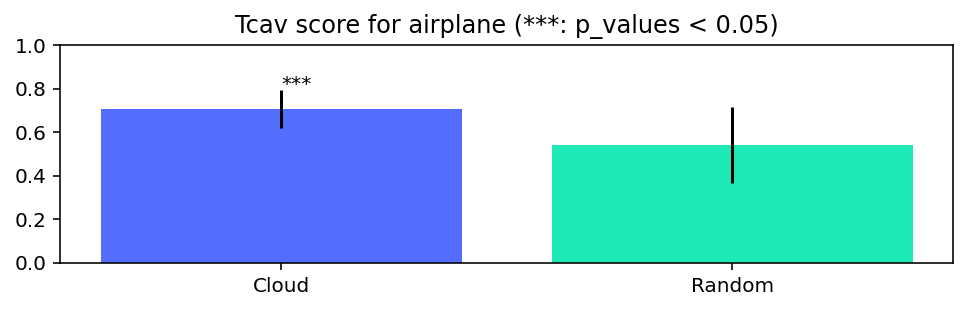

In [76]:
from scipy.stats import ttest_ind
plt.rcParams["figure.figsize"] = [8, 2]

for class_name in tcav_scores.keys():

  concept_score = []
  
  for concept_id, concept_name in enumerate(tcav_scores[class_name].keys()):
      scores = tcav_scores[class_name][concept_name]
      mean = np.mean(scores)
      std = np.std(scores)

      concept_score.append((concept_name, mean, std))

  # we will plot mean and std of the TCAV scores
  means = [mean for concept_name, mean, std in concept_score]
  stds  = [std for concept_name, mean, std in concept_score]
  # the p-values will attests to the significance of a cav in relation to random cavs
  p_values = [ttest_ind(tcav_scores[class_name][concept_name], 
                        tcav_scores[class_name]['random'], equal_var = True)[1] 
              for concept_name in tcav_scores[class_name].keys()]
  
  # plot the bar and their stds
  plt.bar(range(len(concept_score)),
          height=means, yerr=stds, 
          color=["#536DFE", "#1DE9B6", "#F50057", "#78909C"])
  # add '***' if the t-test is passed else 'x'
  for index, data in enumerate(p_values[:-1]):
    plt.text(x=index , y=means[index] + stds[index], s=f"{'***' if data < 0.05 else 'x'}")

  plt.xticks(range(len(concept_score)), [concept_name.capitalize() for concept_name, mean, std in concept_score])
  plt.ylim([0.0, 1.0])
  plt.title(f"Tcav score for {class_name} (***: p_values < 0.05)")
  plt.show()